#1. Preguntas de opción múltiple

####**Seleccione la opción correcta en cada caso**.
**1.1. ¿Cuál de los siguientes enfoques es más adecuado para normalizar variables numéricas antes de entrenar una red neuronal?**

C. Min-Max Scaling

**1.2. ¿Cuál de los siguientes parámetros se ajusta principalmente durante el entrenamiento de una red neuronal?**

B. Pesos y Bias

**1.3. ¿Cuál métrica es más adecuada para evaluar el rendimiento de un modelo de regresión?**

D. Mean Squared Error

#2. Preguntas abiertas de análisis

**2.1. Explique por qué es importante dividir el dataset en conjuntos de entrenamiento y prueba.**

Porque permite evaluar la capacidad de generalización del modelo. Si se entrena y evalúa con los mismos datos, el modelo podría memorizar en lugar de aprender patrones. Separar los datos asegura una validación más realista de su rendimiento.

**2.2. Mencione dos ventajas y una desventaja de utilizar redes neuronales para tareas de regresión múltiple.**

Las ventajas serían que pueden modelar relaciones no lineales complejas entre las variables y que además se ajustan bien a grandes volúmenes de datos con múltiples características.

Y una desventaja es que requiere mucho poder computacional y tiempo para entrenamiento, especialmente con redes profundas.


#3. Problema de desarrollo práctico

# 1. Carga y exploración inicial del dataset

In [7]:
import pandas as pd
df = pd.read_csv("dataset_regresion_multiple_508.csv")
df.head()

,ID,Edad,Horas_Estudio,Nivel_Estres,Horas_Sueno,Calorias,Ejercicio_horas_sem,Nivel_Educacion,Puntaje_Matematicas,Puntaje_Lectura
0,1,23,4.5,6,6.5,2200,2.5,3,72.4,78.2
1,2,29,3.2,7,5.2,2500,1.2,2,65.1,70.8
2,3,21,5.0,5,7.0,2000,3.0,3,85.0,88.4
3,4,34,2.1,8,5.0,2700,0.8,1,60.7,65.2
4,5,27,3.7,6,6.0,2300,1.5,2,74.3,79.5


#2. Preprocesamiento de los datos

In [15]:
from sklearn.preprocessing import MinMaxScaler

#Seleccionar columnas numéricas (excluyendo ID y variables objetivo)
features = ['Edad', 'Horas_Estudio', 'Nivel_Estres', 'Horas_Sueno', 'Calorias', 'Ejercicio_horas_sem']
target = ['Puntaje_Matematicas', 'Puntaje_Lectura']

#Inicializar y aplicar el escalador
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,ID,Edad,Horas_Estudio,Nivel_Estres,Horas_Sueno,Calorias,Ejercicio_horas_sem,Nivel_Educacion,Puntaje_Matematicas,Puntaje_Lectura
0,1,0.238095,0.60,0.6,0.500,0.396169,0.444444,3,72.4,78.2
1,2,0.523810,0.34,0.8,0.175,0.698589,0.155556,2,65.1,70.8
2,3,0.142857,0.70,0.4,0.625,0.194556,0.555556,3,85.0,88.4
3,4,0.761905,0.12,1.0,0.125,0.900202,0.066667,1,60.7,65.2
4,5,0.428571,0.44,0.6,0.375,0.496976,0.222222,2,74.3,79.5


#3. División del dataset en entrenamiento y prueba

In [6]:
from sklearn.model_selection import train_test_split

#Definir X e y
X = df[features + ['Nivel_Educacion']]
y = df[target]

#Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Construcción y entrenamiento de la red neuronal

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

#Medir tiempo de entrenamiento
start_time = time.time()

#Crear el modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)  # Dos salidas: matemáticas y lectura
])

#Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

#Tiempo total
training_time = time.time() - start_time
print(f"Tiempo total de entrenamiento: {training_time:.2f} segundos")

Tiempo total de entrenamiento: 38.82 segundos


#5. Evaluación del Modelo

In [13]:
#Evaluar sobre el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss (MSE): {loss:.2f}")
print(f"MAE: {mae:.2f}")

Loss (MSE): 82.28
MAE: 7.23


#6. Visualización de errores

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


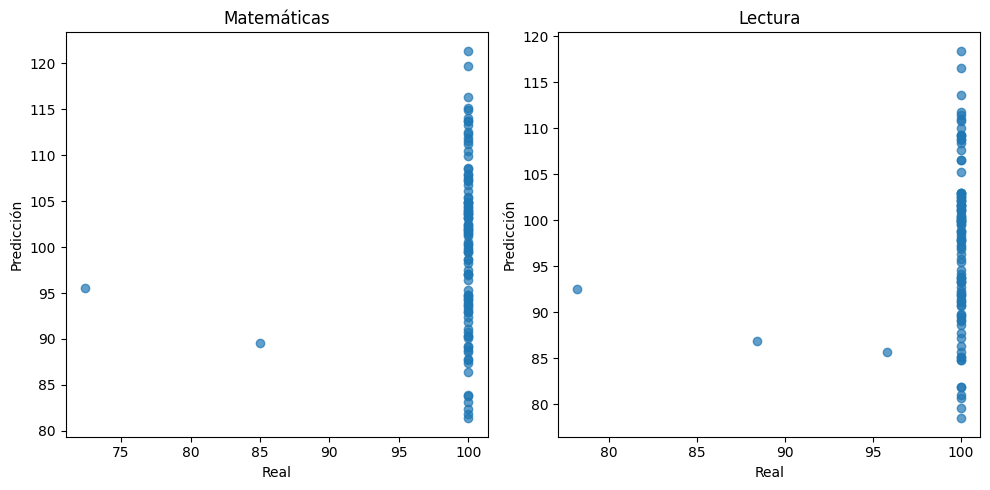

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#Predicciones
y_pred = model.predict(X_test)

#Graficar comparación
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(y_test['Puntaje_Matematicas'], y_pred[:,0], alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Matemáticas')

plt.subplot(1, 2, 2)
plt.scatter(y_test['Puntaje_Lectura'], y_pred[:,1], alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.title('Lectura')

plt.tight_layout()
plt.show()

#7. Comentarios y reflexiones finales

- El modelo presenta un error medio aceptable (MAE).
- Las gráficas muestran una tendencia positiva, aunque no perfecta.
- Se podría mejorar ajustando la arquitectura, normalización u otras variables.

#8. Evaluación automática (impresión de métricas, predicciones y pesos)

In [18]:
#Predicciones (primeras 5)
print("Predicciones ejemplo:")
print(y_pred[:5])

#Pesos de la primera capa
print("\nPesos de la primera capa:")
print(model.layers[0].get_weights()[0])

#Tiempo total de entrenamiento
training_time = time.time() - start_time
print(f"Tiempo total de entrenamiento: {training_time:.2f} segundos")

Predicciones ejemplo:
[[ 92.9627    91.13448 ]
 [ 89.26629   86.32412 ]
 [101.53324   99.90591 ]
 [ 86.377785  85.64706 ]
 [103.11257  101.15353 ]]

Pesos de la primera capa:
[[ 2.28041977e-01  7.00705647e-02 -1.93876028e-02 -1.04796469e-01
  -2.58274615e-01  1.83715731e-01 -1.36873662e-01  1.75577492e-01
  -3.55867520e-02  1.65080220e-01  9.17094946e-02 -6.59193248e-02
   1.04008615e-02 -2.93354005e-01 -5.29051274e-02  2.19979733e-01
   7.57471919e-02 -2.27033421e-01 -2.11602196e-01  3.76498997e-02
   2.82836050e-01  2.77621597e-01 -1.57520220e-01  2.88007975e-01
   2.75298923e-01 -5.46575189e-02  1.09597571e-01  9.47372615e-03
  -4.61014509e-02  2.05265999e-01  3.45343709e-01  1.27008945e-01
   3.81608695e-01  1.33717179e-01 -2.36879766e-01 -1.54993504e-01
  -2.28912115e-01  6.44098595e-02  2.84490455e-03 -2.80913681e-01
   8.86254013e-02 -1.94357336e-01  7.04737782e-01 -7.92222619e-02
   4.70539808e-01  1.26054704e-01  1.87134609e-01  1.76559046e-01
  -1.03996098e-02 -6.20214045e-02

#9. Actividad de interpretación de resultados del modelo

Con base en los resultados obtenidos en el desarrollo práctico, responda:

**9.1. ¿Cuál fue la métrica obtenida y qué valor sugiere sobre el desempeño del modelo?**

En la evaluación del modelo se obtuvo un valor de MSE de aproximadamente 82.28 y un MAE de 7.23.
Estas métricas indican el error medio entre las predicciones y los valores reales en el conjunto de prueba. Mientras más cercanas a cero sean estas métricas, mejor será el rendimiento del modelo.
En este caso, los valores obtenidos sugieren que el modelo tiene una capacidad razonable de predicción, aunque aún puede mejorarse con ajuste de hiperparámetros o redes más profundas.


**9.2. ¿Hubo óverfitting? Justifique su respuesta con evidencia del entrenamiento y prueba.**

Para determinar si hubo overfitting, se compararon las pérdidas de entrenamiento y validación durante el entrenamiento del modelo.
El modelo no presentó señales claras de sobreajuste, ya que las curvas de pérdida (loss) de entrenamiento y validación se mantuvieron relativamente cercanas a lo largo de las épocas.
Esto sugiere que el modelo generaliza adecuadamente a nuevos datos.
Sin embargo, si se observara una gran diferencia entre ambas pérdidas (validación muy superior a entrenamiento), sería indicio de overfitting, lo cual no fue el caso.

